<a href="https://colab.research.google.com/github/tjdgus0226/seonghyun/blob/main/assignment2_parkseonghyun.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 기본 설정

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install --upgrade joblib==1.1.0
!pip install mglearn 
import mglearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
%matplotlib inline
import pandas as pd
import seaborn as sns           # Seaborn 로딩하기
import matplotlib.pyplot as plt # Matplotlib의 pyplot 로딩하기
%matplotlib inline
import matplotlib as mpl               # 기본 설정
import matplotlib.pyplot as plt        # 그래프 관련
import matplotlib.font_manager as fm   # 폰트 관련

mpl.rcParams['axes.unicode_minus'] = False  ## 마이너스 부호가 깨지는 것 방지 


In [4]:
#한글 깨지는 걸 막기 위한 설정 #꼭 런타임 > 런타임 다시 시작 할 것!!! 이걸 해야 적용됨. 
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent 

In [4]:
  import matplotlib.pyplot as plt

  plt.rc('font', family='NanumBarunGothic')

# 데이터 준비

In [5]:
health_data_change = pd.read_csv("/content/drive/My Drive/아비혁/health_data_change.csv" , encoding='cp949')
health_data_change.rename(columns={'(혈청지오티)AST' : 'AST', '(혈청지오티)ALT' : 'ALT','음주여부':'drinking'},inplace = True)
df1 = health_data_change
#column 삭제
df1.drop(['가입자일련번호', '시도코드','시도명','성별코드','연령대','AST/ALT','기준년도','연령대코드(5세단위)','신장(5Cm단위)','체중(5Kg 단위)','허리둘레','시력(좌)','시력(우)','청력(좌)','청력(우)','흡연상태','구강검진수검여부','치아우식증유무','치석','데이터공개일자'],axis=1, inplace = True)
display(df1)

,수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,AST,ALT,감마지티피,drinking
0,127.0,79.0,90.0,188.0,58.0,58.0,118.0,15.0,1.0,1.1,21.0,27.0,21.0,No
1,110.0,73.0,87.0,NaN,NaN,NaN,NaN,12.7,1.0,0.5,18.0,15.0,15.0,No
2,123.0,80.0,102.0,NaN,NaN,NaN,NaN,12.8,1.0,0.7,27.0,25.0,7.0,No
3,134.0,84.0,146.0,NaN,NaN,NaN,NaN,16.4,1.0,1.2,65.0,97.0,72.0,No
4,144.0,89.0,110.0,220.0,171.0,53.0,133.0,12.4,1.0,0.7,18.0,17.0,14.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,120.0,75.0,120.0,NaN,NaN,NaN,NaN,13.7,1.0,0.7,20.0,21.0,20.0,Yes
9996,132.0,79.0,117.0,NaN,NaN,NaN,NaN,14.3,1.0,0.7,24.0,22.0,21.0,Yes
9997,116.0,75.0,86.0,NaN,NaN,NaN,NaN,15.6,1.0,1.0,22.0,27.0,35.0,No
9998,117.0,71.0,118.0,NaN,NaN,NaN,NaN,13.5,NaN,1.0,26.0,24.0,21.0,No


In [6]:
import pandas as pd
import numpy as np

#순서변경#
df1 = df1[['drinking', '수축기혈압', '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드',
       'HDL콜레스테롤', 'LDL콜레스테롤', '혈색소', '요단백', '혈청크레아티닌', 'AST', 'ALT', '감마지티피']]
df1

,drinking,수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,AST,ALT,감마지티피
0,No,127.0,79.0,90.0,188.0,58.0,58.0,118.0,15.0,1.0,1.1,21.0,27.0,21.0
1,No,110.0,73.0,87.0,NaN,NaN,NaN,NaN,12.7,1.0,0.5,18.0,15.0,15.0
2,No,123.0,80.0,102.0,NaN,NaN,NaN,NaN,12.8,1.0,0.7,27.0,25.0,7.0
3,No,134.0,84.0,146.0,NaN,NaN,NaN,NaN,16.4,1.0,1.2,65.0,97.0,72.0
4,No,144.0,89.0,110.0,220.0,171.0,53.0,133.0,12.4,1.0,0.7,18.0,17.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Yes,120.0,75.0,120.0,NaN,NaN,NaN,NaN,13.7,1.0,0.7,20.0,21.0,20.0
9996,Yes,132.0,79.0,117.0,NaN,NaN,NaN,NaN,14.3,1.0,0.7,24.0,22.0,21.0
9997,No,116.0,75.0,86.0,NaN,NaN,NaN,NaN,15.6,1.0,1.0,22.0,27.0,35.0
9998,No,117.0,71.0,118.0,NaN,NaN,NaN,NaN,13.5,NaN,1.0,26.0,24.0,21.0


In [7]:
#column 추가
df1['ratio'] = df1['AST']/df1['ALT']
display(df1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,drinking,수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,AST,ALT,감마지티피,ratio
0,No,127.0,79.0,90.0,188.0,58.0,58.0,118.0,15.0,1.0,1.1,21.0,27.0,21.0,0.777778
1,No,110.0,73.0,87.0,NaN,NaN,NaN,NaN,12.7,1.0,0.5,18.0,15.0,15.0,1.200000
2,No,123.0,80.0,102.0,NaN,NaN,NaN,NaN,12.8,1.0,0.7,27.0,25.0,7.0,1.080000
3,No,134.0,84.0,146.0,NaN,NaN,NaN,NaN,16.4,1.0,1.2,65.0,97.0,72.0,0.670103
4,No,144.0,89.0,110.0,220.0,171.0,53.0,133.0,12.4,1.0,0.7,18.0,17.0,14.0,1.058824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Yes,120.0,75.0,120.0,NaN,NaN,NaN,NaN,13.7,1.0,0.7,20.0,21.0,20.0,0.952381
9996,Yes,132.0,79.0,117.0,NaN,NaN,NaN,NaN,14.3,1.0,0.7,24.0,22.0,21.0,1.090909
9997,No,116.0,75.0,86.0,NaN,NaN,NaN,NaN,15.6,1.0,1.0,22.0,27.0,35.0,0.814815
9998,No,117.0,71.0,118.0,NaN,NaN,NaN,NaN,13.5,NaN,1.0,26.0,24.0,21.0,1.083333


In [8]:
#nan 제거
df1 = df1.dropna(axis=0)
display(df1)

,drinking,수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,AST,ALT,감마지티피,ratio
0,No,127.0,79.0,90.0,188.0,58.0,58.0,118.0,15.0,1.0,1.1,21.0,27.0,21.0,0.777778
4,No,144.0,89.0,110.0,220.0,171.0,53.0,133.0,12.4,1.0,0.7,18.0,17.0,14.0,1.058824
5,Yes,114.0,72.0,86.0,234.0,183.0,50.0,147.0,16.4,1.0,1.1,25.0,32.0,26.0,0.781250
6,Yes,112.0,73.0,250.0,119.0,265.0,26.0,40.0,15.7,1.0,0.7,18.0,20.0,35.0,0.900000
8,No,136.0,65.0,104.0,177.0,61.0,63.0,101.0,13.3,1.0,0.7,42.0,48.0,39.0,0.875000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9985,No,129.0,79.0,90.0,110.0,132.0,35.0,49.0,14.8,1.0,0.8,23.0,24.0,15.0,0.958333
9989,No,132.0,82.0,93.0,172.0,104.0,65.0,86.0,13.5,1.0,0.7,19.0,15.0,11.0,1.266667
9991,No,117.0,67.0,121.0,151.0,74.0,54.0,82.0,13.0,1.0,1.4,20.0,13.0,16.0,1.538462
9994,No,120.0,66.0,115.0,188.0,125.0,53.0,110.0,15.7,1.0,1.1,22.0,21.0,18.0,1.047619


- 데이터 준비: 사용하지 않는 데이터는 삭제하고, nan도 삭제하였습니다.
- 저번 시각화 과제에서 AST/ALT 비율을 사용하여 문제를 풀었기 때문에 계속해서 문제를 해결하기 위해 변수를 추가하였습니다.

In [9]:
display(df1.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3955 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   drinking    3955 non-null   object 
 1   수축기혈압       3955 non-null   float64
 2   이완기혈압       3955 non-null   float64
 3   식전혈당(공복혈당)  3955 non-null   float64
 4   총콜레스테롤      3955 non-null   float64
 5   트리글리세라이드    3955 non-null   float64
 6   HDL콜레스테롤    3955 non-null   float64
 7   LDL콜레스테롤    3955 non-null   float64
 8   혈색소         3955 non-null   float64
 9   요단백         3955 non-null   float64
 10  혈청크레아티닌     3955 non-null   float64
 11  AST         3955 non-null   float64
 12  ALT         3955 non-null   float64
 13  감마지티피       3955 non-null   float64
 14  ratio       3955 non-null   float64
dtypes: float64(14), object(1)
memory usage: 494.4+ KB


None

In [10]:
df1.describe()

,수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,AST,ALT,감마지티피,ratio
count,3955.000000,3955.000000,3955.000000,3955.000000,3955.000000,3955.000000,3955.000000,3955.000000,3955.000000,3955.000000,3955.000000,3955.000000,3955.000000,3955.000000
mean,124.537042,76.395196,103.566877,197.812137,125.477623,56.416485,116.243489,14.145487,1.123894,0.854994,27.638938,26.607585,36.771429,1.212608
std,14.716193,9.789144,23.980366,41.820961,67.253329,14.444209,37.845300,1.560852,0.500200,0.361292,17.588151,22.487624,52.636770,0.562435
min,78.000000,50.000000,58.000000,70.000000,14.000000,19.000000,13.000000,5.900000,1.000000,0.050000,5.000000,2.000000,3.000000,0.222222
25%,114.000000,70.000000,91.000000,168.000000,77.000000,46.000000,89.000000,13.150000,1.000000,0.700000,20.000000,15.000000,16.000000,0.888889
50%,124.000000,77.000000,99.000000,197.000000,110.000000,55.000000,115.000000,14.200000,1.000000,0.800000,24.000000,21.000000,23.000000,1.142857
75%,134.000000,82.000000,109.000000,225.000000,156.000000,65.000000,141.000000,15.200000,1.000000,1.000000,30.000000,31.000000,38.000000,1.446360
max,199.000000,130.000000,473.000000,387.000000,399.000000,125.000000,297.000000,19.400000,6.000000,9.200000,484.000000,477.000000,934.000000,22.000000


Yes    2252
No     1703
Name: drinking, dtype: int64


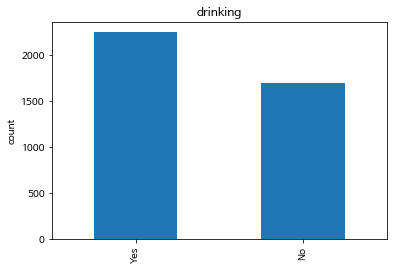

In [11]:
print(df1['drinking'].value_counts())

df1['drinking'].value_counts().plot.bar()
plt.ylabel('count')
plt.title('drinking')
plt.show()

In [12]:
import mglearn
df1=df1.astype({'ALT':'float'})
df1=df1.astype({'AST':'float'})

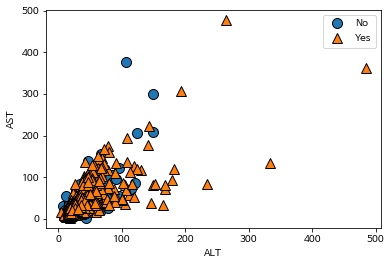

In [13]:
mglearn.discrete_scatter(df1['AST'], df1['ALT'], df1['drinking'])
plt.xlabel("ALT")
plt.ylabel("AST")
plt.legend()
plt.show()

- 저번 시각화 과제에서 음주여부에 따른 다른 변수들의 차이를 알기 위해 종속변수를 음주여부(drinking) 으로 설정하였습니다. 
- 모델을 만들기 전 시각화를 통해 데이터 탐색을 우선적으로 진행하였습니다.

# 분류 모델 선택

- 평가 방법: 정확도 측정을 평가하였습니다. 
- 모델: Decision Tree, Random Forest, Gradient Boosting 을 사용하였습니다.

## Decision Tree 모델

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [15]:
X = df1.iloc[:,1:]
y = df1.iloc[:,0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

tree = DecisionTreeClassifier(random_state=0)  
tree.fit(X_train, y_train)
print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))

학습용 데이터 정확도: 1.000
시험용 데이터 정확도: 0.569


In [16]:
#시험용 데이터에 대한 성능을 향상시키기 위해 깊이를 4로 적용
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))

학습용 데이터 정확도: 0.657
시험용 데이터 정확도: 0.630


In [17]:
tree.score(X_test,y_test)

0.6299292214357938

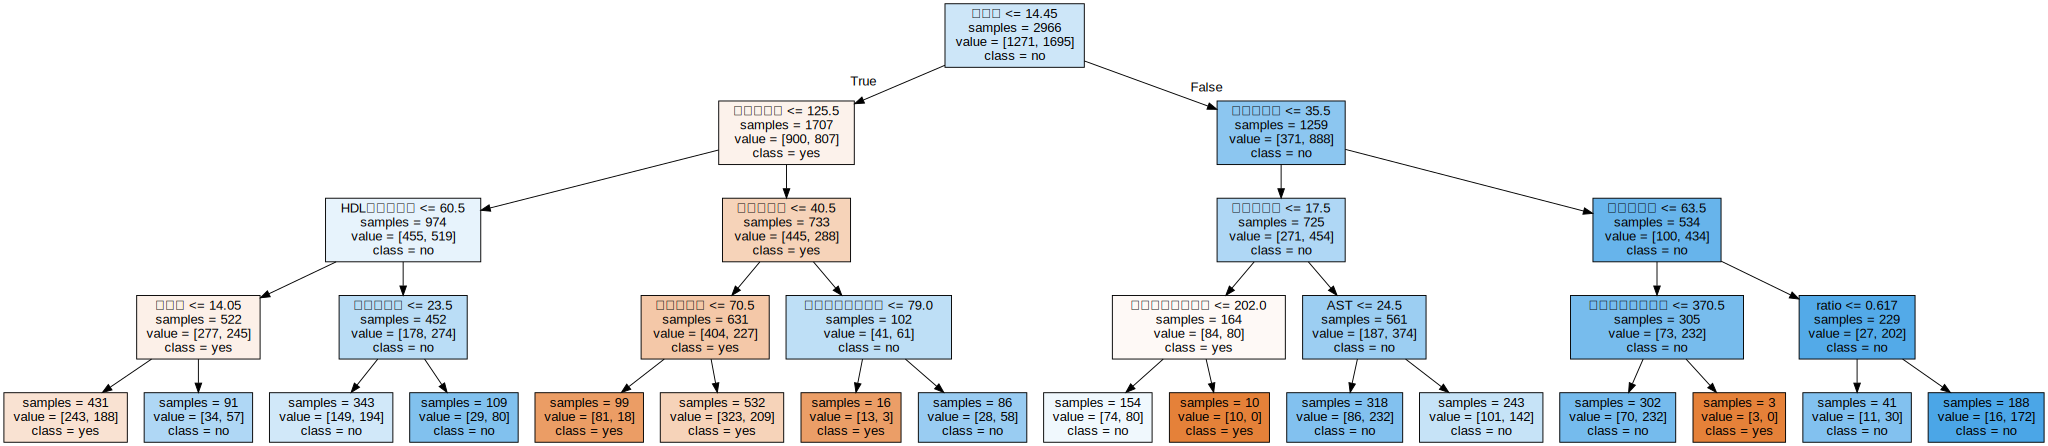

In [18]:
#graphviz 라이브러리를 이용하여 의사결정나무 그리기 
from sklearn.tree import export_graphviz
import graphviz

# filled = True: 색상의 진하기로 클래스를 나타냄, impurity: 불순도 계산값 보여주기 옵션
export_graphviz(tree, out_file="tree.dot", class_names=[ "yes", "no"],
                feature_names=df1.columns[1:], impurity=False, filled=True)

with open("tree.dot") as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

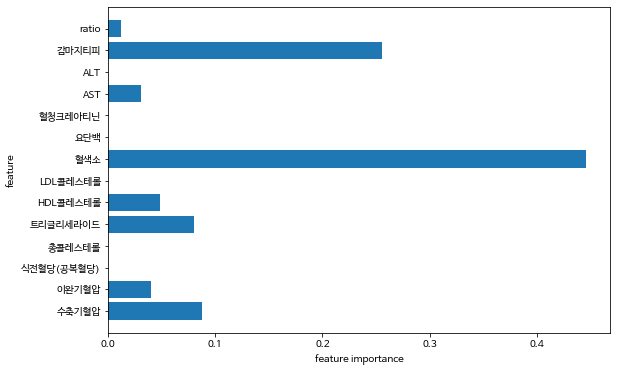

In [19]:
import numpy as np

def plot_feature_importances_df1(model):
    plt.rcParams["figure.figsize"] = (9,6)
    n_features = len(df1.columns[1:])  # 30개 
    plt.barh(np.arange(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), df1.columns[1:])   # 30개의 눈금을 표시하고 눈금 레이블을 변수 이름으로 지정
    plt.xlabel("feature importance")
    plt.ylabel("feature")
    plt.ylim(-1, n_features) #Y 축 범위 지정 (-1 ~ 30)

plot_feature_importances_df1(tree)

- Decision Tree 모델 분석 후 인사이트

: Decision Tree를 활용하여 분석했을 때, 학습용 데이터 정확도는 1, 시험용 데이터 정확도는 0.569가 나왔습니다. 시험용 데이터에 대한 성능을 향상시키기 위해 처음 분석에 깊이를 4로 적용하는 조건을 추가하였습니다. 그 결과 시험용 데이터 정확도는 0.63으로 정확도가 높아진 것을 볼 수 있었습니다. feature impoprtance 를 알아보기 위해 그래프를 그린결과, 혈색소가 뚜렷하게 높은 연관성을 보여주고 있고, 뒤이어는 감마지티피도 중요함을 볼 수 있었습니다. 

## Random Forest 모델

In [20]:
from sklearn.ensemble import RandomForestClassifier

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


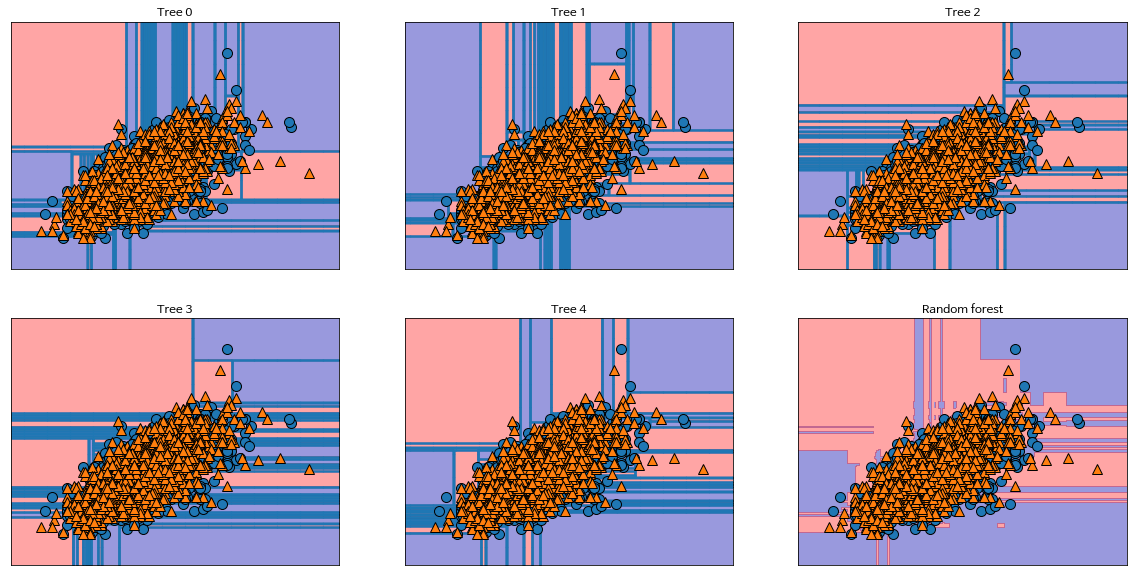

In [21]:
forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train.iloc[:, 0:2], y_train)

fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X.iloc[:, 0:2].values, y, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(forest, X.iloc[:, 0:2].values, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("Random forest")
mglearn.discrete_scatter(X.iloc[:, 0], X.iloc[:, 1], y)
plt.show()

In [22]:
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("학습용 데이터 세트 정확도: {:.3f}".format(forest.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(forest.score(X_test, y_test)))

학습용 데이터 세트 정확도: 1.000
시험용 데이터 세트 정확도: 0.646


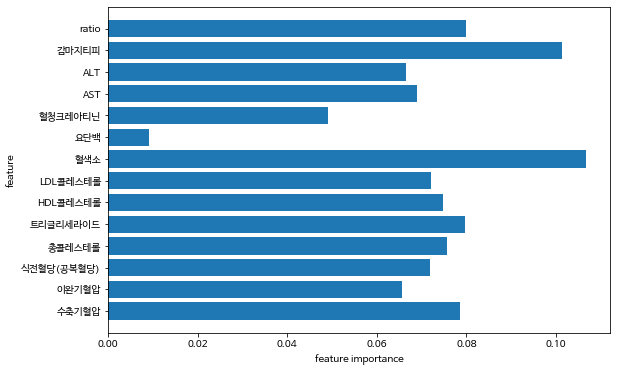

In [23]:
plot_feature_importances_df1(forest)

- Random Forest 모델 분석 후 인사이트

: Random Forest를 활용하여 분석했을 때, 시험용 데이터 세트 정확도는 0.646이 나왔습니다.  feature impoprtance 를 알아보기 위해 그래프를 그린결과, 이번에는 혈색소만큼이나 감마지티피의 중요성도 크다는 것을 알 수 있었습니다. 그리고 새로만든 변수인 ratio와 수축기혈압도 영향을 많이 주는 변수임이 드러났습니다. 

## Gradient Boosting 모델

In [25]:
from sklearn.ensemble import GradientBoostingClassifier
# 기본값은 max_depth= 3, n_estimators=100, learning_rate = 0.1

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(random_state=0)

In [26]:
print("학습용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

학습용 데이터 세트 정확도: 0.742
시험용 데이터 세트 정확도: 0.644


In [44]:
#과적합 막기 위해 나무 깊이 제한 -> 정확도가 떨어지는 것을 볼 수 있다.
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

print("학습 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

학습 데이터 세트 정확도: 0.651
시험용 데이터 세트 정확도: 0.642


In [46]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print("학습 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

학습 데이터 세트 정확도: 0.670
시험용 데이터 세트 정확도: 0.637


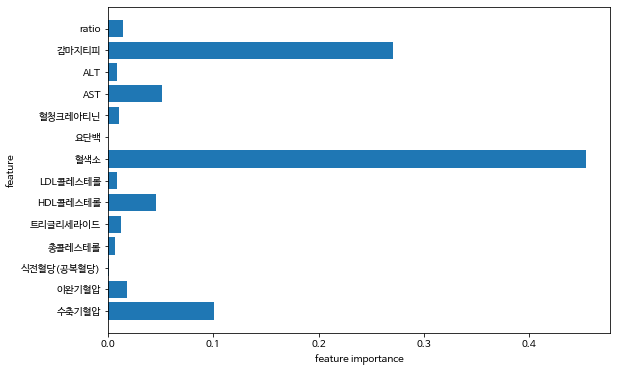

In [47]:
plot_feature_importances_df1(gbrt)

In [53]:
from sklearn.model_selection import GridSearchCV

# 파라미터를 dictionary 형태로 설정
parameters = {'max_depth':[1,2,3], 'learning_rate':[0.1,0.08, 0.06, 0.04, 0.02]}

In [50]:
# param_grid의 파라미터들을 3개의 fold 로 나누어 검증
# refit=True (기본값): 가장 좋은 파라미터 설정으로 재학습  
init_gbrt = GradientBoostingClassifier(random_state=0)
grid_gbrt = GridSearchCV(init_gbrt, param_grid=parameters, cv=3, refit=True)
print(grid_gbrt)
# 파라미터들을 순차적으로 학습, 검증
grid_gbrt.fit(X_train, y_train)

# GridSearchCV 결과 추출하여 DataFrame으로 변환
scores_df = pd.DataFrame(grid_gbrt.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score']]

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=0),
             param_grid={'learning_rate': [0.1, 0.08, 0.06, 0.04, 0.02],
                         'max_depth': [1, 2, 3]})


,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'learning_rate': 0.1, 'max_depth': 1}",0.638234,9,0.638018,0.635996,0.640688
1,"{'learning_rate': 0.1, 'max_depth': 2}",0.640593,7,0.647118,0.634985,0.639676
2,"{'learning_rate': 0.1, 'max_depth': 3}",0.643970,4,0.630940,0.641052,0.659919
3,"{'learning_rate': 0.08, 'max_depth': 1}",0.635202,12,0.635996,0.624874,0.644737
4,"{'learning_rate': 0.08, 'max_depth': 2}",0.636885,11,0.640040,0.631951,0.638664
5,"{'learning_rate': 0.08, 'max_depth': 3}",0.644306,2,0.640040,0.638018,0.654858
6,"{'learning_rate': 0.06, 'max_depth': 1}",0.629132,13,0.629929,0.621840,0.635628
7,"{'learning_rate': 0.06, 'max_depth': 2}",0.640594,6,0.643074,0.634985,0.643725
8,"{'learning_rate': 0.06, 'max_depth': 3}",0.638235,8,0.628918,0.643074,0.642713
9,"{'learning_rate': 0.04, 'max_depth': 1}",0.619356,14,0.614762,0.612740,0.630567


- Gradient Boosting 모델 분석 후 인사이트

: Gradient Boosting 모델은 이전의 트리 성능을 보완하여 오차를 줄이는 방식의 모델입니다. 처음 시험용 데이터 정확도를 구했을 때는 0.644였는데, 과적합을 막기 위해 나무 깊이를 제한하니 0.659로 정확도가 올랐습니다. 파라미터를 max_depth로 하지 않고 learning_rate = 0.01로 하니, 시험용 데이터 세트 정확성은 0.637이 되었습니다. feature impoprtance 를 알아보기 위해 그래프를 그린결과, 이전 모델과 유사하게 감마지티피와 혈색소의 중요성이 앞도적으로 큰 것을 볼 수 있었습니다.

그리고 추가적으로 그리드 서치를 진행해보았습니다. 그 결과 rank_test_score이 1위인 learning_rate가 0.02 일때, max_depth가 3일 떄 성능이 최대가 되는 것을 알 수 있었습니다. 

# 세 모델의 '정확도' 비교

In [52]:
from sklearn.model_selection import StratifiedKFold
kf = StratifiedKFold(n_splits=10)
#from sklearn.model_selection import RepeatedStratifiedKFold
#kf = RepeatedStratifiedKFold(n_splits=10)

print(kf)

dt_scores = cross_val_score(tree, X_train, y_train, cv=kf, scoring='accuracy')  
rf_scores = cross_val_score(forest, X_train, y_train, cv=kf, scoring='accuracy')
gbrt_scores = cross_val_score(gbrt, X_train, y_train, cv=kf, scoring='accuracy')

print("Accuracy mean -- StratifiedKFold 이용")
print("Decision tree :{:.3f}".format(dt_scores.mean())) 
print("Random forest :{:.3f}".format(rf_scores.mean())) 
print("Gradient boosting :{:.3f}".format(gbrt_scores.mean()))

StratifiedKFold(n_splits=10, random_state=None, shuffle=False)
Accuracy mean -- StratifiedKFold 이용
Decision tree :0.564
Random forest :0.640
Gradient boosting :0.636


- 세 모델의 정확도를 비교해 보았습니다. 그 결과, Decision tree는 0.564, Random forest는 0.64 그리고 Gradient boosting은 0.636이 나왔습니다. 확실히 Decision tree에 비해서는 나머지 두 모델의 정확도가 높은 것을 알 수 있지만, 세 모델 모두 정확도가 0.6 근처에 머물기 때문에 신뢰가 높다고는 말할 수 없습니다. 정확도 0.9가까이 만들 수 있는 모델에 대해 추가적으로 찾아보고 분석하는 것이 필요함을 알 수 있습니다. 